In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

In [3]:
train = pd.read_csv('F:\Predicting-Food-Delivery-Time---Hackathon-by-IMS-Proschool-master\Data_Train_food.csv')
test = pd.read_csv('F:\Predicting-Food-Delivery-Time---Hackathon-by-IMS-Proschool-master\Data_Test_food.csv')

In [7]:
train.shape

(11094, 9)

In [8]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [9]:
train.head()


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [10]:
train.isnull().sum()


Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [11]:
train.describe(include = 'all')


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [13]:
test.shape

(2774, 8)

In [14]:
test.columns


Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews'],
      dtype='object')

In [15]:
test.head()


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [17]:
test.isnull().sum()


Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

In [19]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     2774 non-null   object
 1   Location       2774 non-null   object
 2   Cuisines       2774 non-null   object
 3   Average_Cost   2774 non-null   object
 4   Minimum_Order  2774 non-null   object
 5   Rating         2774 non-null   object
 6   Votes          2774 non-null   object
 7   Reviews        2774 non-null   object
dtypes: object(8)
memory usage: 173.5+ KB


In [20]:
test.describe(include = 'all')


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774,2774,2774,2774,2774,2774,2774,2774
unique,2401,35,881,19,9,30,580,392
top,ID_1209,"D-Block, Sector 63, Noida",North Indian,₹200,₹50,-,-,-
freq,8,221,226,820,2556,305,542,593


### Data Cleaning

In [21]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [22]:
#Finding the unique values in Average_Cost
train['Average_Cost'].unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [23]:
train[train['Average_Cost'] == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [25]:
#replacing 'for' with 200
train['Average_Cost'].replace('for', '200', inplace = True)

In [26]:
train['Average_Cost_Cleaned'] = train['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [27]:
train['Average_Cost_Cleaned'].unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
       1100, 1400, 2050], dtype=int64)

In [28]:
test['Average_Cost'].unique()

array(['₹350', '₹100', '₹200', '₹150', '₹300', '₹50', '₹250', '₹500',
       '₹650', '₹400', '₹550', '₹450', '₹600', '₹750', '₹850', '₹1,000',
       '₹700', '₹800', '₹1,200'], dtype=object)

In [29]:
test['Average_Cost_Cleaned'] = test['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [30]:
test['Average_Cost_Cleaned'].unique()

array([ 350,  100,  200,  150,  300,   50,  250,  500,  650,  400,  550,
        450,  600,  750,  850, 1000,  700,  800, 1200], dtype=int64)

In [31]:
train['Minimum_Order'].unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59'], dtype=object)

In [32]:
train['Minimum_Order_Cleaned'] = train['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [33]:
test['Minimum_Order'].unique()

array(['₹50', '₹99', '₹500', '₹0', '₹200', '₹149', '₹199', '₹399', '₹89'],
      dtype=object)

In [34]:
test['Minimum_Order_Cleaned'] = test['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [35]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


In [36]:
#A function to find the maximun number of features in a single cell
def max_features_in_single_row(train, test, delimiter):
  max_info = 0 
  item_lis = list(train.append(test))
  for i in item_lis:
    if len(i.split("{}".format(delimiter))) > max_info:
      max_info = len(i.split("{}".format(delimiter)))
  print("\n","-"*35)    
  print("Max_Features in One Observation = ", max_info)
  return max_info

In [37]:
#This function splits a column in to n features where n is the maximum number of features in a single cell
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}

  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  
  print("-"*35)
  print("Features Dictionary : ", extracted_features)

  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)


  return extracted_features

In [38]:
#Splitting Location
loc_max = max_features_in_single_row(test['Location'],train['Location'], ',')
train_Location_splits = feature_splitter(train['Location'], 'Location', ',', loc_max)
test_Location_splits = feature_splitter(test['Location'], 'Location', ',', loc_max)


100%|██████████████████████████████████████████████████████████████████████████| 2774/2774 [00:00<00:00, 115583.67it/s]


 -----------------------------------
Max_Features in One Observation =  4
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': [], 'Location_Feature_4': []}


In [39]:
#Splitting Cuisines
cus_max = max_features_in_single_row(test['Cuisines'],train['Cuisines'], ',')
train_Cuisines_splits = feature_splitter(train['Cuisines'], 'Cuisines', ',', cus_max)
test_Cuisines_splits = feature_splitter(test['Cuisines'], 'Cuisines', ',', cus_max)

  0%|                                                                                         | 0/2774 [00:00<?, ?it/s]


 -----------------------------------
Max_Features in One Observation =  8
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': [], 'Cuisines_Feature_6': [], 'Cuisines_Feature_7': [], 'Cuisines_Feature_8': []}


100%|███████████████████████████████████████████████████████████████████████████| 2774/2774 [00:00<00:00, 69341.39it/s]


In [40]:
train.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
count,11094,11094,11094,11094,11094,11094,11094,11094,11094,11094.000000,11094.000000
unique,7480,35,2179,26,18,33,1103,761,7,NaN,NaN
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes,NaN,NaN
freq,22,947,850,3241,10118,1191,2074,2312,7406,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.708671,53.344511
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.833261,18.551245
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000


In [41]:
#A function to find all the non numeric values
def non_numerals(series):
  non_numerals = []
  for i in series.unique():
    try :
      i = float(i)
    except:
      non_numerals.append(i)
  return non_numerals

In [45]:
# A function to replace the non-numeric values
def replace_nn_with(series, type_, fill_with = None, method = 'mean'):

  nn = non_numerals(series)
  print('-'*30)
  print('-'*30)
  print("Non Numerals in column ",series.name," : ",nn)

  series = series.replace(nn, np.nan, inplace = False)
  nulls = series.isnull().sum()
  if fill_with:
    series.fillna(fill_with, inplace = True)
    print("Filling Non Numerals with {}".format(fill_with))
  
  else:
    series = series.replace(nn, np.nan, inplace = False)

    if method == 'mean' :
      rep = series.astype(float).mean()
      print("Filling Non Numerals with MEAN = ", rep)

    elif method == 'median' :
      rep = series.astype(float).median()
      print("Filling Non Numerals with MEDIAN = ", rep)
    elif method == 'min' :
      rep = series.astype(float).min()
      print("Filling Non Numerals with MINIMUM = ", rep)

    else:
      print('Please pass a valid method as a string -- ("mean" or "median" or "min")')
      return 0

    series.fillna(rep, inplace = True)
    
  try:
    series = series.astype(type_)
    print(nulls, ": observations replaced")
    return series
  except:
    # Since type conversion of a string containting decimals to int is not possible, it is first converted to float
    series =  series.astype(float)
    print(nulls, ": observations replaced")
    series =  series.astype(type_)
    return series

In [46]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


In [47]:
train['Rating_Cleaned'] = replace_nn_with(train['Rating'],float, method = 'mean')

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['-', 'NEW', 'Opening Soon', 'Temporarily Closed']
Filling Non Numerals with MEAN =  3.6134596429744668
1963 : observations replaced


In [48]:
test['Rating_Cleaned'] = replace_nn_with(test['Rating'],float, fill_with = 3.6134596429744668)

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['NEW', '-', 'Opening Soon']
Filling Non Numerals with 3.6134596429744668
507 : observations replaced


In [49]:
train['Votes_Cleaned'] = replace_nn_with(train['Votes'],int,method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with MEAN =  244.54445676274943
2074 : observations replaced


In [50]:
test['Votes_Cleaned'] = replace_nn_with(test['Votes'],int,fill_with = 244.54445676274943)

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with 244.54445676274943
542 : observations replaced


In [51]:
train['Reviews_Cleaned'] = replace_nn_with(train['Reviews'],int, method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with MEAN =  123.24789341835573
2312 : observations replaced


In [52]:
test['Reviews_Cleaned'] = replace_nn_with(test['Reviews'],int, method =  'mean',fill_with = 123.247893 )

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with 123.247893
593 : observations replaced


In [53]:
train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50,3.5,12,4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50,3.5,11,4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50,3.6,99,30
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99,3.7,176,95
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99,3.2,521,235


In [54]:
train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned'],
      dtype='object')

In [55]:
cols = ['Restaurant',  'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned','Delivery_Time' ]

In [56]:
train_sample = train[cols]
test_sample = test[cols[:-1]]

In [57]:
train_sample = pd.concat([pd.DataFrame(train_Location_splits), pd.DataFrame(train_Cuisines_splits),train_sample],sort=False,axis = 1)
test_sample = pd.concat([pd.DataFrame(test_Location_splits), pd.DataFrame(test_Cuisines_splits), test_sample],sort=False,axis = 1)

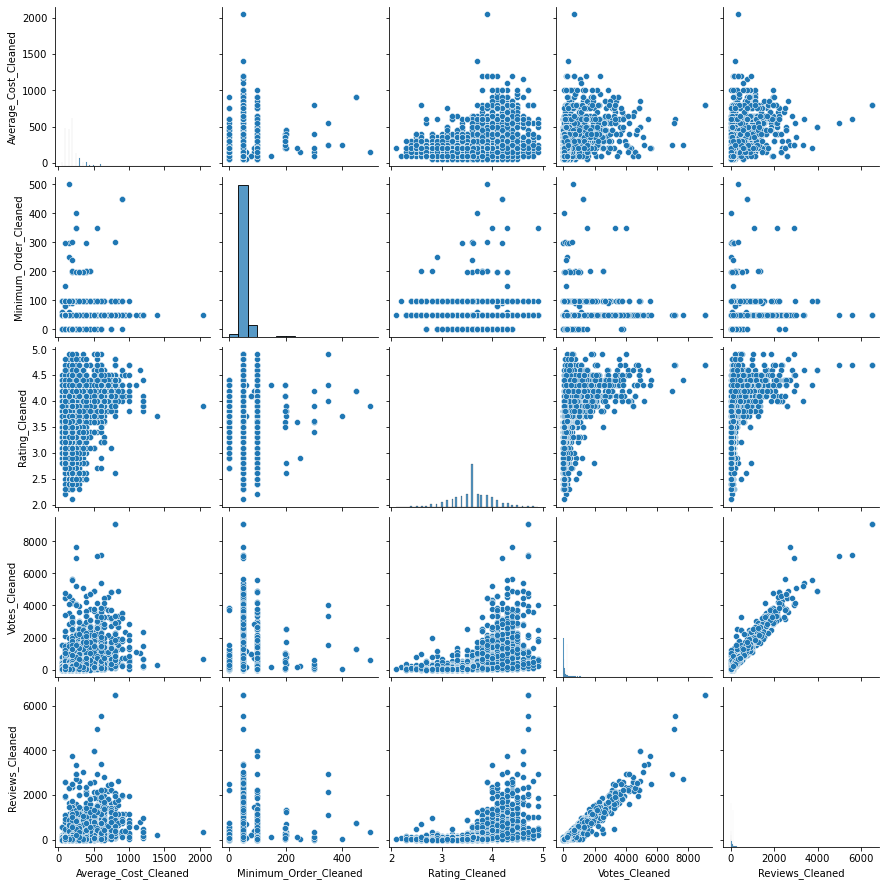

In [58]:
#lets take a look at the relation between the numeric features in the dataset
import seaborn
seaborn.pairplot(train_sample)

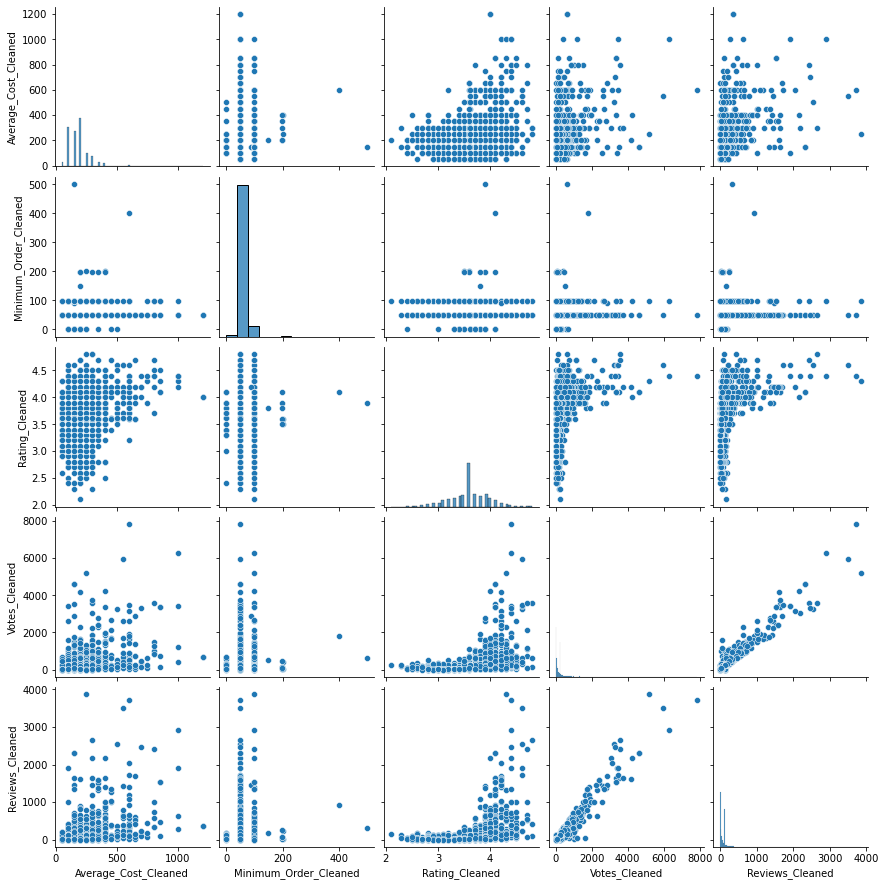

In [59]:
seaborn.pairplot(test_sample)

### Data Preprocessing

In [60]:
train_sample.isnull().sum()

Location_Feature_1           0
Location_Feature_2        1942
Location_Feature_3        6364
Location_Feature_4       10068
Cuisines_Feature_1           0
Cuisines_Feature_2        3012
Cuisines_Feature_3        6931
Cuisines_Feature_4        9393
Cuisines_Feature_5       10449
Cuisines_Feature_6       10854
Cuisines_Feature_7       10978
Cuisines_Feature_8       11046
Restaurant                   0
Average_Cost_Cleaned         0
Minimum_Order_Cleaned        0
Rating_Cleaned               0
Votes_Cleaned                0
Reviews_Cleaned              0
Delivery_Time                0
dtype: int64

In [61]:
train_sample.fillna('NAN', inplace = True)

In [62]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [63]:
test_sample.fillna('NAN', inplace = True)

In [64]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Location_Feature_4       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Cuisines_Feature_6       0
Cuisines_Feature_7       0
Cuisines_Feature_8       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

### Encoding Categories

In [65]:
temp1 = []
for i in train_Cuisines_splits.keys():
  for j in train_Cuisines_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Cuisines_splits.keys():
  for j in test_Cuisines_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN')

In [66]:
len(unique_cuisines)

103

In [67]:
temp1 = []
for i in train_Location_splits.keys():
  for j in train_Location_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Location_splits.keys():
  for j in test_Location_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_locations = list(pd.Series(temp1).unique())
unique_locations.append('NAN')

In [68]:
len(unique_locations)

67

In [69]:
#encoding the categorical Features
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_locations)

In [70]:
for i in train_Location_splits.keys():
  train_sample[i] = le_l.transform(train_sample[i])

In [71]:
for i in train_Cuisines_splits.keys():
  train_sample[i] = le_c.transform(train_sample[i])

In [72]:
for i in train_Location_splits.keys():
  test_sample[i] = le_l.transform(test_sample[i])

In [73]:
for i in test_Cuisines_splits.keys():
  test_sample[i] = le_c.transform(test_sample[i])

In [74]:
# Restraunt id
t1 = list(train_sample['Restaurant'])
t2 = list(test_sample['Restaurant'])

t1.extend(t2)
unique_ids = list(set(t1))

In [75]:
len(unique_ids)

8661

In [76]:
le_id = LabelEncoder().fit(unique_ids)

In [77]:
train_sample['Restaurant'] = le_id.transform(train_sample['Restaurant'])
test_sample['Restaurant'] = le_id.transform(test_sample['Restaurant'])

### Scaling

In [78]:
cols = list(train_sample.columns)

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [80]:
train_sample[cols[:-1]] = ss.fit_transform(train_sample[cols[:-1]])

In [81]:
test_sample[cols[:-1]] = ss.fit_transform(test_sample[cols[:-1]])

In [82]:
train_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned,Delivery_Time
0,-0.867166,-0.408678,1.683093,-0.161374,-0.714599,1.656380,0.137213,3.865914,7.460013,-0.125106,-0.08579,-0.057042,0.625956,-0.020864,-0.180293,-0.301852,-0.464423,-0.417345,30 minutes
1,1.246323,-0.117669,-0.660441,-0.161374,-0.312564,-0.125757,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-0.897145,-0.791117,-0.180293,-0.301852,-0.466421,-0.417345,30 minutes
2,0.242416,-1.669717,-0.660441,-0.161374,-0.129821,1.953402,0.534663,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,-1.467013,-0.405990,-0.180293,-0.035808,-0.290596,-0.326311,65 minutes
3,1.140649,0.415848,-0.660441,-0.161374,0.637700,1.326354,0.354004,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.451808,0.364263,2.461158,0.230235,-0.136749,-0.098724,30 minutes
4,0.982137,-0.602684,2.580618,-0.161374,-1.043537,-0.620795,-0.621557,-0.359765,-0.205249,-0.125106,-0.08579,-0.057042,0.538284,-0.020864,2.461158,-1.099981,0.552564,0.391462,65 minutes


In [83]:
test_sample.head()

,Location_Feature_1,Location_Feature_2,Location_Feature_3,Location_Feature_4,Cuisines_Feature_1,Cuisines_Feature_2,Cuisines_Feature_3,Cuisines_Feature_4,Cuisines_Feature_5,Cuisines_Feature_6,Cuisines_Feature_7,Cuisines_Feature_8,Restaurant,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,0.083713,1.243494,-0.479103,0.871523,0.809765,-0.204497,-0.346423,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.897086,1.350471,-0.177278,1.612406,0.276837,0.428327
1,0.083713,1.243494,-0.479103,0.871523,-1.302905,0.628995,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,1.096904,-0.833142,-0.177278,0.029586,0.029087,0.035125
2,1.143599,0.416451,-0.673221,-0.151585,-0.746940,-1.104668,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.101583,-0.833142,-0.177278,-0.006736,-0.411358,-0.377352
3,-1.665097,0.367801,-0.236455,-0.151585,0.513250,1.362467,0.393217,1.259565,7.241203,-0.12173,-0.082445,-0.042516,0.278454,0.040303,-0.177278,-0.006736,-0.347833,-0.311818
4,1.143599,0.416451,-0.673221,-0.151585,-0.932262,-0.037799,-0.605296,-0.351099,-0.196822,-0.12173,-0.082445,-0.042516,-0.715119,-0.396419,-0.177278,-1.895735,-0.407123,-0.385062


### Modeling

In [84]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_sample, test_size = 0.1, random_state = 123)

In [85]:
X_train = train[cols[:-1]]
Y_train = train[cols[-1]]

X_Val = val[cols[:-1]]
Y_Val = val[cols[-1]]

X_test = test_sample[cols[:-1]]

In [88]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,Y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got ['10 minutes' '120 minutes' '20 minutes' '30 minutes' '45 minutes'
 '65 minutes' '80 minutes']

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [90]:
clf.fit(X_train,Y_train)
clf.score(X_Val,Y_Val)

0.6954954954954955

In [91]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier()

In [92]:
Rforest.fit(X_train,Y_train)
Rforest.score(X_Val,Y_Val)

0.7783783783783784

In [93]:
Predictions = Rforest.predict(X_test)